In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob

In [2]:
basepath = '/n/home01/abeane/starbar/'
trq_data_path = basepath + '/analysis/torques-fixedps/data/'

In [3]:
def read_torques(name, lvl, idx_max=None):
    nsnap = len(glob(trq_data_path + '/torques_' + name + '-' + lvl + '/torques_' + name + '-' + lvl + '.*.hdf5'))
    
    out = {}
    out['Time'] = []
    
    for i in range(nsnap):
        if idx_max is not None:
            if i >= idx_max:
                break
        
        fname = trq_data_path + '/torques_' + name + '-' + lvl + '/torques_' + name + '-' + lvl + '.'+str(i)+'.hdf5'
        
        f = h5.File(fname, mode='r')
        
        if i==0:
            for key in f['total_torques'].attrs.keys():
                out[key] = []
        
        for key in f['total_torques'].attrs.keys():
            out[key].append(f['total_torques'].attrs[key])
    
        out['Time'].append(f['parameters'].attrs['Time'])
    
    
    for key in out.keys():
        out[key] = np.array(out[key])
    
    return out
        

In [4]:
name = 'Nbody-fixedps'
lvl = 'lvl3-ps30'
i = 0

In [5]:
torques = read_torques(name, lvl)

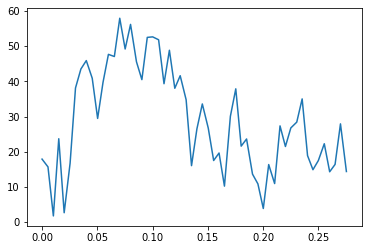

In [6]:
plt.plot(torques['Time'][:56], torques['halo'][:,2][:56])
plt.show()

In [7]:
name = 'Nbody-fixedps'
ps_list = [30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]

ave_halo_tz = []

for ps in ps_list:
    lvl = 'lvl3-ps'+str(ps)
    torques = read_torques(name, lvl, idx_max=None)
    
    ave_halo_tz.append(np.mean(torques['halo'][:,2][50:]))
    

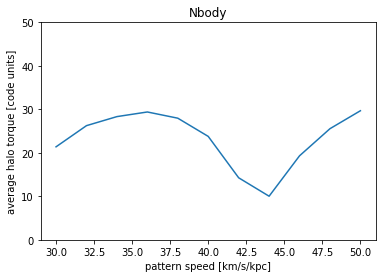

In [8]:
plt.plot(ps_list, ave_halo_tz)
plt.ylim(0, 50)
plt.xlabel('pattern speed [km/s/kpc]')
plt.ylabel('average halo torque [code units]')
plt.title('Nbody')
plt.show()

In [15]:
name = 'phantom-vacuum-Sg20-Rc3.5-fixedps'
lvl = 'lvl3-ps38'
i = 0

In [16]:
torques = read_torques(name, lvl)

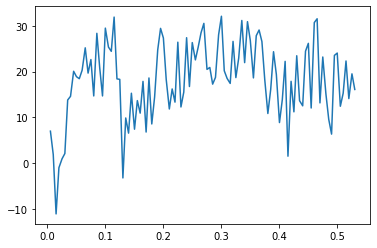

In [17]:
plt.plot(torques['Time']-1.5, torques['halo'][:,2])
plt.show()

In [18]:
name = 'phantom-vacuum-Sg20-Rc3.5-fixedps'
ps_list = [30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]

ave_halo_tz = []

for ps in ps_list:
    lvl = 'lvl3-ps'+str(ps)
    torques = read_torques(name, lvl, idx_max=None)
    
    ave_halo_tz.append(np.mean(torques['halo'][:,2][50:]))
    

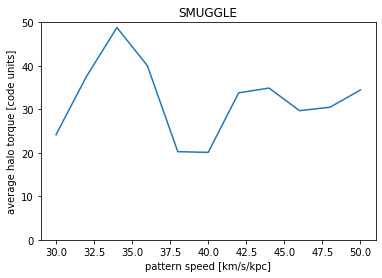

In [20]:
plt.plot(ps_list, ave_halo_tz)
plt.ylim(0, 50)
plt.xlabel('pattern speed [km/s/kpc]')
plt.ylabel('average halo torque [code units]')
plt.title('SMUGGLE')
plt.show()